In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
aapl=pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco=pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm=pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn=pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [21]:
stocks=pd.concat([aapl,cisco,ibm,amzn],axis=1)

In [22]:
stocks.columns=['aapl','cisco','ibm','amzn']

In [23]:
stocks

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56
...,...,...,...,...
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13


In [24]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [25]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [27]:
log_ret=np.log(stocks/stocks.shift(1))

In [28]:
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246A54E8A60>,
      dtype=object)

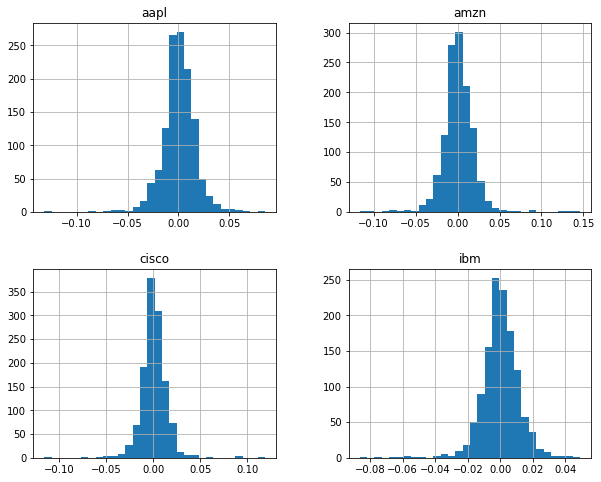

In [14]:
log_ret.hist( bins=30,figsize=(10,8))

In [29]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [31]:
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [32]:
np.random.seed(101)
print(stocks.columns)
weight=np.array(np.random.random(4))

print('weights')
print(weight)

print('Rebalance')
weight=weight/np.sum(weight)
print(weight)

print('Portfolio Return')
exp_ret=np.sum(log_ret.mean()*weight*252)

print('exp_volatility')
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov() * 252, weight)))


#sharpe ratio

sr=exp_ret/exp_vol

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Portfolio Return
exp_volatility


In [ ]:
#automating the optimization for many other weighted values




In [ ]:
np.random.seed(101)

weight=np.array(np.random.random(4))

weight=weight/np.sum(weight)


exp_ret=np.sum(log_ret.mean()*weight*252)

exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_ret.cov() * 252, weight)))


#sharpe ratio

sr=exp_ret/exp_vol

In [53]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [55]:
sharpe_arr.max()

1.0272770415283319

In [56]:
sharpe_arr.argmax()

14202

In [57]:
all_weights[14202,:]

array([0.13584546, 0.41395224, 0.0178857 , 0.4323166 ])

In [60]:
max_sr_ret = ret_arr[14202]
max_sr_vol = vol_arr[14202]

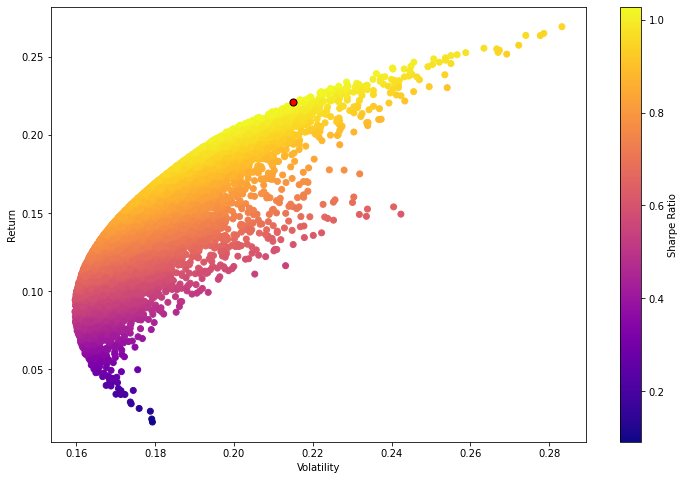

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')